# Logistic Regression

`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes. 
Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then be mapped to two or more discrete classes.

Logistic regression can be used for:
1. Binary Classification
2. Multi-class Classification
3. One-vs-Rest Classification

## Assumptions of Logistic regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [24]:
# data import
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df.drop(['deck'], inplace=True, axis=1)
df['age'].fillna(df['age'].median(), inplace=True)
# We use index 0 of mode because mode() returns a Series of the most frequent values.
# If there are multiple modes, mode()[0] gives the first one, which is commonly used for filling missing values.
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True) 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [27]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [28]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [29]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [31]:
X = df.drop('survived', axis=1)
y = df['survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(70.72222222222221, 0.5, 'Actual')

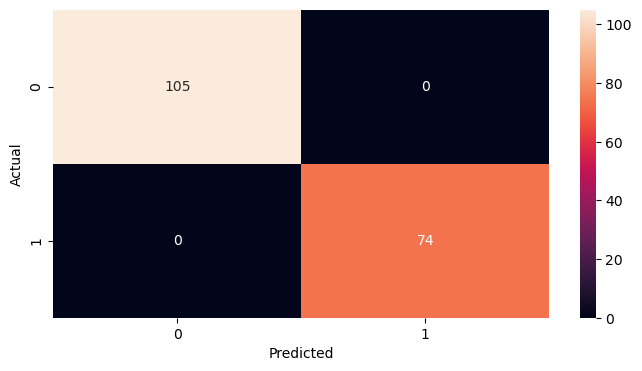

In [ ]:
# plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
import pickle
pickle.dump(model, open('./saved_models/logistic_model.pkl', 'wb'))

### **Logistic Regression Explained Simply**  

#### **What is Logistic Regression?**  
Logistic Regression is a **classification algorithm** (not regression!) used to predict **binary outcomes** (Yes/No, 1/0, Spam/Not Spam). It estimates the **probability** that an input belongs to a certain class.  

---

### **How Does It Work?**  
1. **Input Features**: Takes input data (e.g., age, salary, exam scores).  
2. **Sigmoid Function**: Squishes the output into a range between **0 and 1** (probability).  
   - If probability ≥ 0.5 → Predicts class **1**.  
   - If probability < 0.5 → Predicts class **0**.  

![Sigmoid Curve](https://www.saedsayad.com/images/LogReg_1.png)  
*(The "S-curve" maps inputs to probabilities.)*  

---

### **Key Concepts**  
1. **Decision Boundary**:  
   - A line (or curve) that separates classes (e.g., "Pass" vs. "Fail").  
   - Example: If `Exam Score > 50` → Pass, else Fail.  

2. **Training**:  
   - Adjusts weights to **minimize prediction errors** (using "log loss").  
   - Unlike linear regression, it doesn’t use squared errors.  

3. **Output**:  
   - Not a number (like in linear regression), but a **probability** (e.g., 0.7 → 70% chance of "Yes").  

---

### **Example Use Cases**  
- **Medical**: Predict if a tumor is malignant (1) or benign (0).  
- **Finance**: Will a loan applicant default (Yes/No)?  
- **Marketing**: Will a user click an ad (1) or ignore it (0)?  

---

### **Why Use Logistic Regression?**  
✅ Simple, interpretable (you can explain predictions).  
✅ Works well with small datasets.  
✅ Outputs probabilities (not just labels).  

❌ Only works for **linear relationships**.  
❌ Struggles with complex patterns (use neural networks or tree-based models for those).  

---

### **Logistic vs. Linear Regression**  
| Feature          | Logistic Regression           | Linear Regression       |  
|------------------|-------------------------------|-------------------------|  
| **Output**       | Probability (0 to 1)          | Continuous value (e.g., price) |  
| **Use Case**     | Classification (Yes/No)       | Regression (How much?)  |  
| **Equation**     | Sigmoid function              | Straight line           |  

---

### **In a Nutshell**  
Logistic Regression is like a **smart yes/no machine** that learns from past data to make future binary decisions. It’s the go-to tool for simple classification tasks!  